In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

--2024-12-28 08:59:23--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
connected. to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... 
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv.2’

laptops.csv.2       100%[===================>] 291.58K  1.90MB/s    in 0.2s    

2024-12-28 08:59:23 (1.90 MB/s) - ‘laptops.csv.2’ saved [298573/298573]



In [3]:
df=pd.read_csv("laptops.csv")

In [4]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


<Axes: xlabel='final_price', ylabel='Count'>

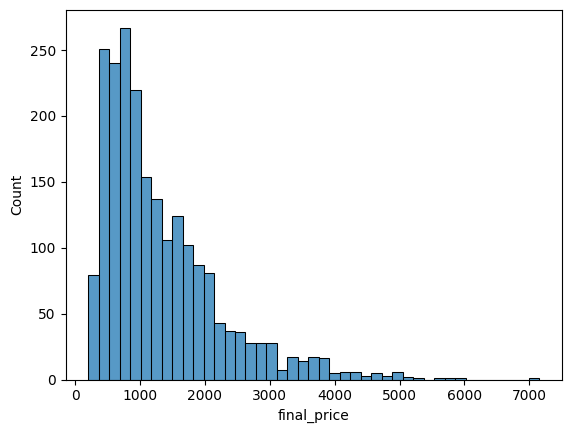

In [7]:
sns.histplot(df.final_price)

<Axes: xlabel='final_price', ylabel='Count'>

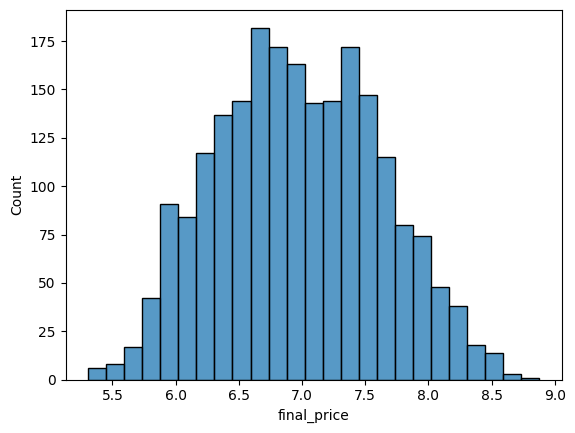

In [8]:
sns.histplot(np.log1p(df.final_price))

In [9]:
cols=['ram','storage','screen','final_price']
data=df[cols]

In [10]:
data

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [11]:
data.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

question 1 = screen

In [12]:
np.median(data['ram'])

np.float64(16.0)

question 2=16

In [13]:
idx=np.arange(2160)
np.random.seed(42)
np.random.shuffle(idx)

In [14]:
n=int(len(data))

In [15]:
len_val=int(n*0.2)
len_test=int(n*0.2)
len_train=int(n-len_val-len_test)

In [16]:
X_train=data.iloc[idx[:len_train]]
X_val=data.iloc[idx[len_train:len_train+len_val]]
X_test=data.iloc[idx[len_train+len_val:]]

In [17]:
X_train=X_train.reset_index(drop=True)
X_val=X_val.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)

In [18]:
y_train=X_train['final_price']
y_val=X_val['final_price']
y_test=X_test['final_price']

In [19]:
del X_train['final_price']
del X_val['final_price']
del X_test['final_price']

In [20]:
def prepare_X(X):
    X=X.copy()
    X=X.fillna(0)
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones, X])
    return X

In [21]:
X_train_prepared = prepare_X(X_train)
X_val_prepared = prepare_X(X_val)
X_test_prepared = prepare_X(X_test)

In [22]:
def train_linear_regression(X,y,r):
    XTX=(X.T).dot(X)
    reg=r*np.eye(XTX.shape[0])
    XTX=XTX+reg
    w=(np.linalg.inv(XTX).dot(X.T)).dot(y)
    return w

In [23]:
w=train_linear_regression(X_train_prepared,np.log1p(y_train),0)

In [24]:
y_pred=X_val_prepared.dot(w)

In [25]:
def rmse(y,y_pred):
    error=y-y_pred
    se=error**2
    mse=se.mean()
    return np.sqrt(mse)

In [34]:
rmse(np.log1p(y_val),y_pred)

np.float64(0.42886353154744156)

 fillna(0) is better

In [27]:
def prepare_X_mean_method(X):
    X=X.copy()
    X=X.fillna(X['screen'].mean())
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones, X])
    return X

In [28]:
X_train_prepared1 = prepare_X_mean_method(X_train)
X_val_prepared1 = prepare_X_mean_method(X_val)
X_test_prepared1 = prepare_X_mean_method(X_test)

In [29]:
w1=train_linear_regression(X_train_prepared1,np.log1p(y_train),0)

In [30]:
y_pred1=X_val_prepared1.dot(w1)

In [31]:
rmse(np.log1p(y_val),y_pred1)

np.float64(0.43117372937296844)

In [41]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w=train_linear_regression(X_train_prepared,np.log1p(y_train),r)
    y_pred=X_val_prepared.dot(w)
    print('%6s' %r, rmse(np.log1p(y_val), y_pred))

     0 0.42886353154744156
  0.01 0.4288516360534089
   0.1 0.4287756009707645
     1 0.4305932989743414
     5 0.4632095257580651
    10 0.507565776923692
   100 0.6735026061725821


r=0.1=> rmse = 0.4287756009707645 

In [63]:
rmse_list = []
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(2160)
    np.random.seed(i)
    np.random.shuffle(idx)
    features=['ram','storage','screen','final_price']
    raw=df[features]
    raw=raw.fillna(0)
    raw_train=raw.iloc[idx[:len_train]]
    raw_val=raw.iloc[idx[len_train:len_train+len_val]]
    raw_test=raw.iloc[idx[len_train+len_val:]]
    y_raw_train=np.log1p(raw_train['final_price'])
    y_raw_val=np.log1p(raw_val['final_price'])
    y_raw_test=np.log1p(raw_test['final_price'])
    del raw_train['final_price']
    del raw_val['final_price']
    del raw_test['final_price']
    w=train_linear_regression(prepare_X(raw_train),y_raw_train,0)
    y_pred=prepare_X(raw_val).dot(w)
    rmse_value = rmse(np.expm1(y_raw_val), np.expm1(y_pred)) 
    rmse_list.append(rmse_value)
    print('%6i' %i, rmse(np.expm1(y_raw_val), np.expm1(y_pred)))

     0 892.1458337583954
     1 2518.905310163822
     2 2530.8284381118888
     3 963.5704734522069
     4 869.1699396716925
     5 956.675789718476
     6 2515.84015040416
     7 914.7889864248299
     8 834.0084017860748
     9 716.9941263995555


In [64]:
rmse_list

[np.float64(892.1458337583954),
 np.float64(2518.905310163822),
 np.float64(2530.8284381118888),
 np.float64(963.5704734522069),
 np.float64(869.1699396716925),
 np.float64(956.675789718476),
 np.float64(2515.84015040416),
 np.float64(914.7889864248299),
 np.float64(834.0084017860748),
 np.float64(716.9941263995555)]

In [68]:
rmse_list=np.array(rmse_list)
rmse_list.std()

np.float64(756.07915990354)

In [70]:
idx = np.arange(2160)
np.random.seed(9)
np.random.shuffle(idx)

features=['ram','storage','screen','final_price']
raw1=df[features]
raw1=raw1.fillna(0)

raw1_train=raw.iloc[idx[:len_train+len_val]]
raw1_test=raw.iloc[idx[len_train+len_val:]]

y_raw1_train=np.log1p(raw1_train['final_price'])
y_raw1_test=np.log1p(raw1_test['final_price'])

del raw1_train['final_price']
del raw1_test['final_price']

w=train_linear_regression(prepare_X(raw1_train),y_raw1_train,0.001)
y_pred=prepare_X(raw1_test).dot(w)

rmse(np.expm1(y_raw1_test),np.expm1(y_pred))

np.float64(890.588808736886)